In [4]:
from dowhy import CausalModel
import dowhy.datasets
import numpy as np

# Load some sample data
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000, 
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)
df = data["df"]

In [6]:
df.head()

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,0.711721,0.0,0.517211,-1.315349,0.383720,-0.253435,2.040289,0,True,10.304199
1,-2.158016,0.0,0.253664,0.179240,0.592284,-1.691426,0.591249,0,True,8.239347
2,-1.330422,0.0,0.163312,-0.948811,-0.365154,0.507224,-0.181188,2,True,12.574671
3,1.523812,0.0,0.795780,-2.120547,-0.694138,-0.750625,0.744186,1,True,6.096234
4,-0.915356,0.0,0.420115,-2.171470,-0.845940,0.719185,-1.916564,1,True,4.060151


In [7]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

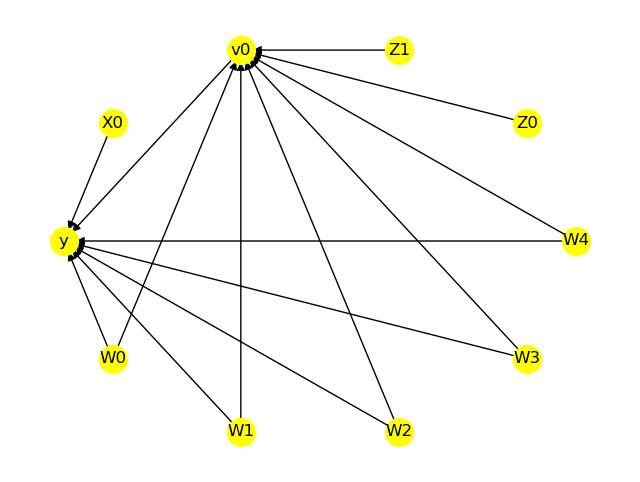

In [8]:
model.view_model()


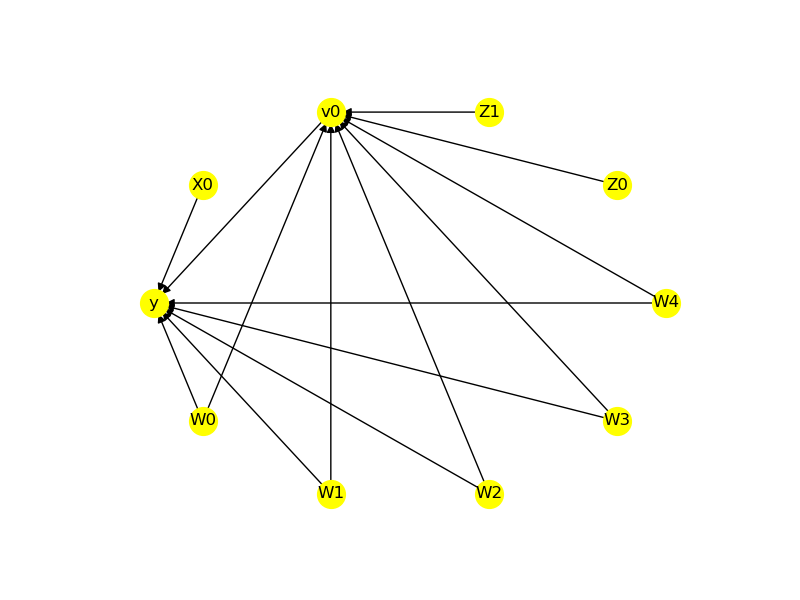

In [9]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

## Identification

In [10]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W3,W4,W1,W0,W2])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W4,W1,W0,W2,U) = P(y|v0,W3,W4,W1,W0,W2)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₁  Z₀]    ⎝d[Z₁  Z₀]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## Estimation

causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)